In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from filtering_visualization import data_visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Specify hpyerparams
Number of source and target clusters is zero because we use mean_shift clustering.
Specify the dataset and the clustering method (or the folder where the cluster files are).

In [3]:
# identity DD: 72593, 71427
# identity PC: 129763, 133760
num_source_cl=72593
num_target_cl=71427
dataset="DailyDialog"
clustering_method="identity_clustering"

### Visualize the clustering.
Graphs on the left are about source data, and on the right the target data.
* First the entropy of all the utterances in the dataset is plotted.
* Second each sentence's cluster's size is plotted (for all sentences in the dataset).
* Third the entropy and cluster size of all clusters is plotted
* Finally the relationship between the entropy of an utterance and the number of words in it is plotted.

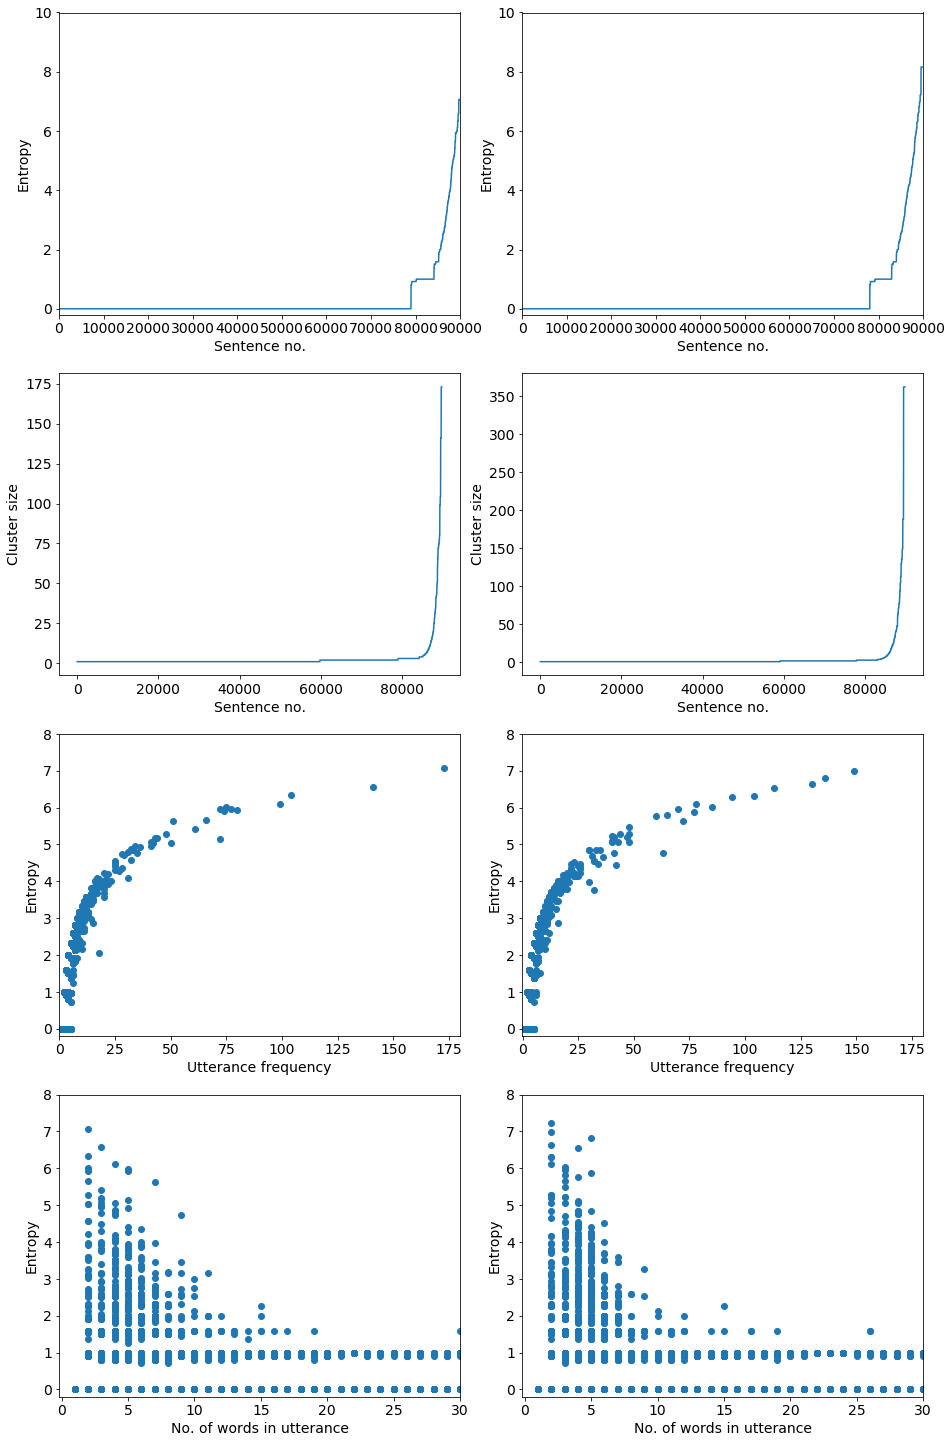

In [11]:
source_entropies, target_entropies, source_cl_sizes, target_cl_sizes = \
    data_visualization(num_source_cl, num_target_cl, dataset, clustering_method)

In [5]:
"""Not used currently.
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl_sizes]
source_entropy_sen=[m[0] for m in source_entropies]
different=0
first_k=20000

for i, medoid in enumerate(source_entropies[:first_k]):
    if medoid[0] not in source_cl_sen[:first_k]:
        #print(medoid)
        different+=1
print(str(different)+": number of sentences which are different in the first "+str(first_k)
      +", ordered based on entropy and cluster size: ")

for i, medoid in enumerate(source_cl_sizes[:first_k]):
    if medoid[0] not in source_entropy_sen[:first_k]:
        print(medoid)
"""

'Not used currently.\n# compare filtering based on cluster size and entropy\nsource_cl_sen=[scl[0] for scl in source_cl_sizes]\nsource_entropy_sen=[m[0] for m in source_entropies]\ndifferent=0\nfirst_k=20000\n\nfor i, medoid in enumerate(source_entropies[:first_k]):\n    if medoid[0] not in source_cl_sen[:first_k]:\n        #print(medoid)\n        different+=1\nprint(str(different)+": number of sentences which are different in the first "+str(first_k)\n      +", ordered based on entropy and cluster size: ")\n\nfor i, medoid in enumerate(source_cl_sizes[:first_k]):\n    if medoid[0] not in source_entropy_sen[:first_k]:\n        print(medoid)\n'

### Print some clusters
Let's see the unique elements of the cluster's with highest entropy.

In [4]:
from filtering_visualization import print_clusters
print_clusters(num_source_cl, num_target_cl, clustering_method, tag='Source')

0.9655471723309074
 yes  .  & 173 & 7.06 \\
Center: yes .
Entropy: 7.063156190026956
Size: 173
Elements: 
 yes  .  


 thank you  .  & 141 & 6.57 \\
Center: thank you .
Entropy: 6.572061902533512
Size: 141
Elements: 
 thank you  .  


 why  ?  & 104 & 6.33 \\
Center: why ?
Entropy: 6.332510270963305
Size: 104
Elements: 
 why  ?  


 here you are  .  & 99 & 6.10 \\
Center: here you are .
Entropy: 6.109055862460153
Size: 99
Elements: 
 here you are  .  


 ok  .  & 75 & 6.00 \\
Center: ok .
Entropy: 6.005420190467042
Size: 75
Elements: 
 ok  .  


 what do you mean  ?  & 77 & 5.97 \\
Center: what do you mean ?
Entropy: 5.971268521186287
Size: 77
Elements: 
 what do you mean  ?  


may i help you  ?  & 72 & 5.96 \\
Center: may i help you ?
Entropy: 5.96499600835671
Size: 72
Elements: 
may i help you  ?  
 may i help you  ?  


can i help you  ?  & 80 & 5.93 \\
Center: can i help you ?
Entropy: 5.934183719779186
Size: 80
Elements: 
can i help you  ?  
 can i help you  ?  


 really  ?  & 7

In [5]:
index = 0

print('Medoid: {}' list(source)[0], source[list(source)[0]])

SyntaxError: invalid syntax (<ipython-input-5-7b33414d52f8>, line 3)